In [20]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, kstest, shapiro

## Data Preparation

In [21]:
# Loading & showing dataset
data = pd.read_csv(filepath_or_buffer='hotel_bookings.csv')
display(data)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Context
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

### Content
This [data set](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

### Acknowledgements
The data is originally from the article [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for [#TidyTuesday during the week of February 11th, 2020](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md).

### Inspiration
This data set is ideal for anyone looking to practice their exploratory data analysis (EDA) or get started in building predictive models!

If you're looking for inspiration on data visualizations, check out the [#TidyTuesday](https://github.com/rfordatascience/tidytuesday) program, a free, weekly online event that encourages participants to create and share their [code and visualizations for a given data set on Twitter](https://twitter.com/search?q=%23TidyTuesday&src=typed_query).

If you'd like to dive into predictive modeling, [Julia Silge](https://twitter.com/juliasilge) has an accessible and fantastic walk-through which highlights the [tidymodels](https://www.tidyverse.org/blog/2018/08/tidymodels-0-0-1/) R package.

### Description

| Column Name | Description |
| --- | --- |
| hotel | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
| is_canceled | Value indicating if the booking was canceled (1) or not (0) |
| lead_time | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
| arrival_date_year | Year of arrival date |
| arrival_date_month | Month of arrival date |
| arrival_date_week_number | Week number of year for arrival date |
| arrival_date_day_of_month | Day of arrival date |
| stays_in_weekend_nights | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| stays_in_week_nights | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| adults | Number of adults |
| children | Number of children |
| babies | Number of babies |
| meal | Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner) |
| country | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
| market_segment | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| distribution_channel | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| is_repeated_guest | Value indicating if the booking name was from a repeated guest (1) or not (0) |
| previous_cancellations | Number of previous bookings that were cancelled by the customer prior to the current booking |
| previous_bookings_not_canceled | Number of previous bookings not cancelled by the customer prior to the current booking |
| reserved_room_type | Code of room type reserved. Code is presented instead of designation for anonymity reasons. |
| assigned_room_type | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons. |
| booking_changes | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| deposit_type | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay. |
| agent | ID of the travel agency that made the booking |
| company | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
| days_in_waiting_list | Number of days the booking was in the waiting list before it was confirmed to the customer |
| customer_type | Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking |
| adr | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
| required_car_parking_spaces | Number of car parking spaces required by the customer |
| total_of_special_requests | Number of special requests made by the customer (e.g. twin bed or high floor) |
| reservation_status | Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why |
| reservation_status_date | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel |

---

## Data Understanding

In [22]:
# Showing more of 'Sample' column
with pd.option_context('display.max_colwidth', 225):

    # Performing initial dataset audit
    print(f'Dataset Rows, Columns: {data.shape[0]}, {data.shape[1]}')

    display(pd.DataFrame({
        'Name': data.columns.values,
        'Type': data.dtypes.values,
        'N/A (n)': data.isna().sum(),
        'N/A (%)': data.isna().mean().values * 100,
        'Unique': data.nunique().values,
        'Sample': [data[column].unique() for column in data.columns]
    }).reset_index()\
        .drop(['index'], axis=1))

Dataset Rows, Columns: 119390, 32


,Name,Type,N/A (n),N/A (%),Unique,Sample
0,hotel,object,0,0.000000,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.000000,2,"[0, 1]"
2,lead_time,int64,0,0.000000,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 32..."
3,arrival_date_year,int64,0,0.000000,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0,0.000000,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,int64,0,0.000000,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
6,arrival_date_day_of_month,int64,0,0.000000,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
7,stays_in_weekend_nights,int64,0,0.000000,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
8,stays_in_week_nights,int64,0,0.000000,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35, 41]"
9,adults,int64,0,0.000000,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


In [23]:
# Generating initial descriptive statistics for dataset
display(data.describe(include=['object']).T, data.describe().T)

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Data Insights

| Column Name | Insights |
| --- | --- |
| hotel | - |
| is_canceled | Will be the target of our prediction |
| lead_time | Outlier: `737.0` is way above the mean, standard deviation, and 75% value of the data |
| arrival_date_year | Invalid data type: `object` instead of `integer` based on data description |
| arrival_date_month | Invalid data type: `object` instead of `integer` based on data description |
| arrival_date_week_number | - |
| arrival_date_day_of_month | - |
| stays_in_weekend_nights | Outlier: `53.0` is way above the mean, standard deviation, and 75% value of the data |
| stays_in_week_nights | Outlier: `31.0` is way above the mean, standard deviation, and 75% value of the data |
| adults | Outlier: `55.0` is way above the mean, standard deviation, and 75% value of the data |
| children | Invalid data type: `int` instead of `float` based on data description |
|  | Missing value: `nan` |
|  | Outlier: `10.0` is way above the mean, standard deviation, and 75% value of the data |
| babies | Outlier: `10.0` is way above the mean, standard deviation, and 75% value of the data |
| meal | Invalid value: `Undefined` —may be recategorized as `SC` based on data description |
| country | Missing value: `nan` |
| market_segment | - |
| distribution_channel | - |
| is_repeated_guest | Invalid data type: `bool` instead of `int` based on data description |
| previous_cancellations | Outlier: `26.0` is way above the mean, standard deviation, and 75% value of the data |
| previous_bookings_not_canceled | Outlier: `72.0` is way above the mean, standard deviation, and 75% value of the data |
| reserved_room_type | - |
| assigned_room_type | - |
| booking_changes | - |
| deposit_type | - |
| agent | Invalid data type: `object` instead of `float` based on data description |
|  | Missing value: `nan` |
| company | Invalid data type: `object` instead of `float` based on data description |
|  | Missing value: `nan` |
| days_in_waiting_list | Outlier: `391.0` is way above the mean, standard deviation, and 75% value of the data |
| customer_type | - |
| adr | Outlier: `-6.38` and `5400.0` is way beyond the mean, standard deviation, and 25% or 75% value of the data, respectively |
| required_car_parking_spaces | Outlier: `8.0` is way above the mean, standard deviation, and 75% value of the data|
| total_of_special_requests | Outlier: `5.0` is way above the mean, standard deviation, and 75% value of the data|
| reservation_status | - |
| reservation_status_date | - |

### Notes

* `PMS` = Property Management System
* `country` nan > UNK? 
* `market_segment`?
* `GDS` = Global Distribution System
* potential `reserved_room_type` and `assigned_room_type` redundant with `booking_changes`?
* `agent` and `company` may share similar values per entry/index?
* transient business consists of corporate and leisure guests looking for short and last-minute hotel stays.
* If a hotel has $50,000 in room revenue and 500 rooms sold, the ADR would be $100 ($50,000/500).
* when the best time of year to book a hotel room is = ?
* the optimal length of stay in order to get the best daily rate = ? 
* whether or not a hotel was likely to receive a disproportionately high number of special requests = `total_of_special_requests`?
* arrival_date = inputted in booking

---

# Data Cleaning

In [24]:
# Making a copy of dataset
df = data.copy()

* To avoid chained indexing

## Duplicated Data

In [25]:
# Detecting any duplicated data
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [26]:
# Dropping duplicated data
df = df.drop_duplicates(keep='first') # Keeping first instances of duplicated data

# Verifying process
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


## Unused Column

In [27]:
# Dropping unused column
df.drop(columns=['agent', 'company', 'reservation_status', 'reservation_status_date'], inplace=True)

# Verifying process
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

## Invalid Data

In [30]:
# Casting columns to their appropriate data type
df = df.astype(dtype={'children': 'Int64'})

# Replacing values in 'meal'
df.replace(to_replace={'meal': {'Undefined': 'SC'}}, inplace=True)

# Verifying process
display(df[['children']].dtypes[1])
display(df.meal.unique())

children    Int64
dtype: object

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

## Missing Value

In [ ]:
# Filtering data with missing value in 'children'
with pd.option_context('display.max_columns', None): # Setting maximum number of column displayed to unlimited
    display(df[df.children.isna()])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,<NA>,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,<NA>,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,<NA>,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,<NA>,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


* Data with missing value in `children` has similar value in `hotel`, `is_canceled`, `arrival_date_year`, etc. but also different value in `lead_time`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, etc. In other words, those missing data points are a random subset of the data. 
* No available information (i.e. other variables in the dataset or information from data description) regarding the missing value in `children`, and
* No known mechanism or reason why the missing values in `children` are introduced in the dataset

Therefore, missing value in `children` may be regarded as Missing Completely At Random (MCAR). If values for observations are missing completely at random, then disregarding those cases would not bias the inferences made; especially when the number/percentage of missing value is relatively small

In [ ]:
# Handling missing value in 'children'
df.dropna(subset='children', inplace=True)

# Verifying process
df[df.children.isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
# Filtering data with missing value in 'country'
with pd.option_context('display.max_columns', None):
    display(df[df.country.isna()])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60651,City Hotel,1,0,2016,November,47,17,4,11,0,0,0,SC,NaN,Corporate,Direct,0,0,0,P,P,0,No Deposit,NaN,279,0,Transient,0.0,0,0,Canceled,2016-11-17
61244,City Hotel,1,0,2016,December,50,6,0,0,0,0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279,0,Transient,0.0,0,0,Canceled,2016-12-06
65907,City Hotel,1,0,2017,April,15,10,0,0,0,0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


* Similar with above explanation, data with missing value in `country` are even more differing with each other, which may also be regarded as MCAR.


In [ ]:
# Handling missing value in 'country'
df.dropna(subset='country', inplace=True)

# Verifying process
df[df.country.isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
# Filtering data with missing value in 'agent'
with pd.option_context('display.max_columns', None):
    display(df[df.agent.isna()])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,NaN,110,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,0,0,BB,PRT,Complementary,Corporate,0,0,0,A,A,0,No Deposit,NaN,72,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,2,0,BB,NLD,Direct,Direct,0,0,0,G,G,0,No Deposit,NaN,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,0,0,BB,BRA,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,0,0,SC,LBN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


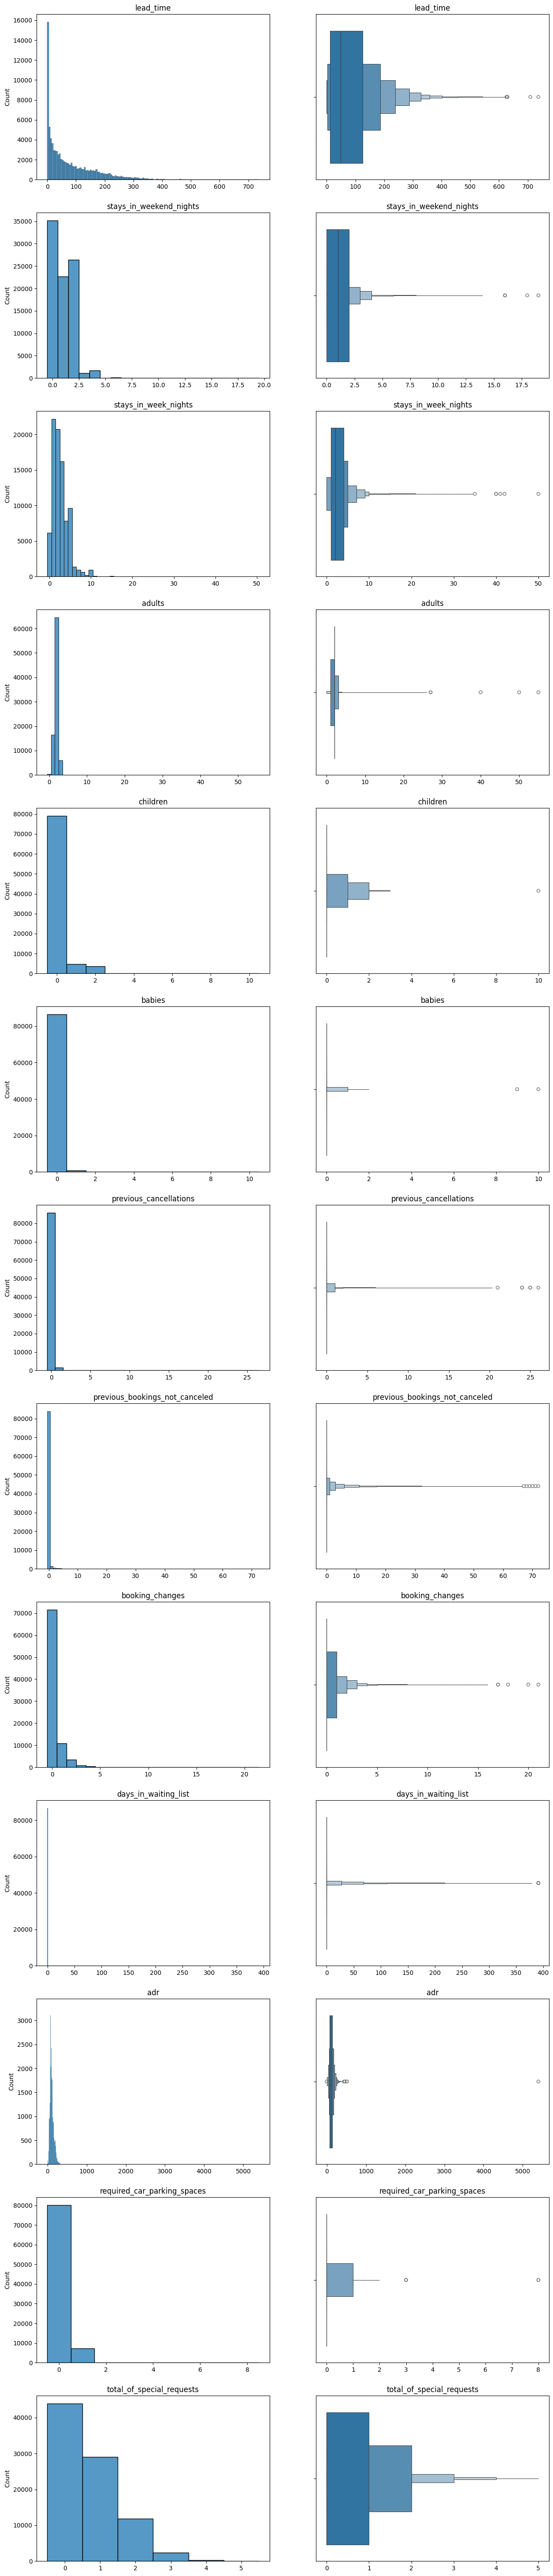

In [31]:
# Creating subplots
fig, axs = plt.subplots(nrows=13, ncols=2, # Setting number of rows & columns
                        figsize=(15, 75))

sns.histplot(data=df, x='lead_time', ax=axs[0, 0]).set(xlabel=None, title='lead_time')
sns.boxenplot(data=df, x='lead_time', ax=axs[0, 1]).set(xlabel=None, title='lead_time')

sns.histplot(data=df, x='stays_in_weekend_nights', discrete=True, ax=axs[1, 0]).set(xlabel=None, title='stays_in_weekend_nights')
sns.boxenplot(data=df, x='stays_in_weekend_nights', ax=axs[1, 1]).set(xlabel=None, title='stays_in_weekend_nights')

sns.histplot(data=df, x='stays_in_week_nights', discrete=True, ax=axs[2, 0]).set(xlabel=None, title='stays_in_week_nights')
sns.boxenplot(data=df, x='stays_in_week_nights', ax=axs[2, 1]).set(xlabel=None, title='stays_in_week_nights')

sns.histplot(data=df, x='adults', discrete=True, ax=axs[3, 0]).set(xlabel=None, title='adults')
sns.boxenplot(data=df, x='adults', ax=axs[3, 1]).set(xlabel=None, title='adults')

sns.histplot(data=df, x='children', discrete=True, ax=axs[4, 0]).set(xlabel=None, title='children')
sns.boxenplot(data=df, x='children', ax=axs[4, 1]).set(xlabel=None, title='children')

sns.histplot(data=df, x='babies', discrete=True, ax=axs[5, 0]).set(xlabel=None, title='babies')
sns.boxenplot(data=df, x='babies', ax=axs[5, 1]).set(xlabel=None, title='babies')

sns.histplot(data=df, x='previous_cancellations', discrete=True, ax=axs[6, 0]).set(xlabel=None, title='previous_cancellations')
sns.boxenplot(data=df, x='previous_cancellations', ax=axs[6, 1]).set(xlabel=None, title='previous_cancellations')

sns.histplot(data=df, x='previous_bookings_not_canceled', discrete=True, ax=axs[7, 0]).set(xlabel=None, title='previous_bookings_not_canceled')
sns.boxenplot(data=df, x='previous_bookings_not_canceled', ax=axs[7, 1]).set(xlabel=None, title='previous_bookings_not_canceled')

sns.histplot(data=df, x='booking_changes', discrete=True, ax=axs[8, 0]).set(xlabel=None, title='booking_changes')
sns.boxenplot(data=df, x='booking_changes', ax=axs[8, 1]).set(xlabel=None, title='booking_changes')

sns.histplot(data=df, x='days_in_waiting_list', discrete=True, ax=axs[9, 0]).set(xlabel=None, title='days_in_waiting_list')
sns.boxenplot(data=df, x='days_in_waiting_list', ax=axs[9, 1]).set(xlabel=None, title='days_in_waiting_list')

sns.histplot(data=df, x='adr', ax=axs[10, 0]).set(xlabel=None, title='adr')
sns.boxenplot(data=df, x='adr', ax=axs[10, 1]).set(xlabel=None, title='adr')

sns.histplot(data=df, x='required_car_parking_spaces', discrete=True, ax=axs[11, 0]).set(xlabel=None, title='required_car_parking_spaces')
sns.boxenplot(data=df, x='required_car_parking_spaces', ax=axs[11, 1]).set(xlabel=None, title='required_car_parking_spaces')

sns.histplot(data=df, x='total_of_special_requests', discrete=True, ax=axs[12, 0]).set(xlabel=None, title='total_of_special_requests')
sns.boxenplot(data=df, x='total_of_special_requests', ax=axs[12, 1]).set(xlabel=None, title='total_of_special_requests')

plt.show()

### business problems:
1. kerugian 1 malam penuh
2. resiko kehilangan pendapatan tambahan
3. cancellation fee tidak menutup semua kerugian
4. biaya operasional tetap

### business goal:
memprediksi pelanggan mana yang akan cancel dan yang tidak 

arrival_date_day = weekday & weeknight

Bisnis perhotelan, sebagaimana bisnis lain pada umumnya, salah satunya berorientasi pada memaksimalkan pendapatan yang diperoleh dari transaksi dengan konsumen dan meminimalkan biaya operasional untuk memperoleh keuntungan. 